In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import os

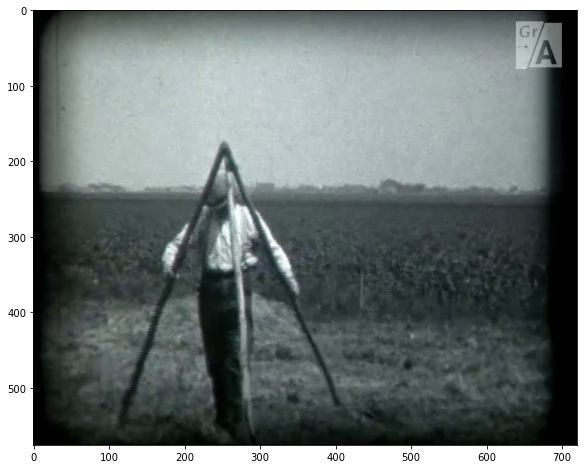

In [2]:
# Loading example image 

#img = plt.imread("frames/AV2171/keyframe_1867.0.jpg")
img = plt.imread("frames/AV0843/keyframe_9145.0.jpg")
#img = plt.imread("frames/contemporary/IMG_2864.jpeg")
#img = plt.imread("frames/AV0539/keyframe_2966.0.jpg")
#img = cv2.imread("/Users/blazejmanczak/Desktop/sudoku.jpg")
plt.figure(figsize = (10,8))
plt.imshow(img, cmap = "gray")

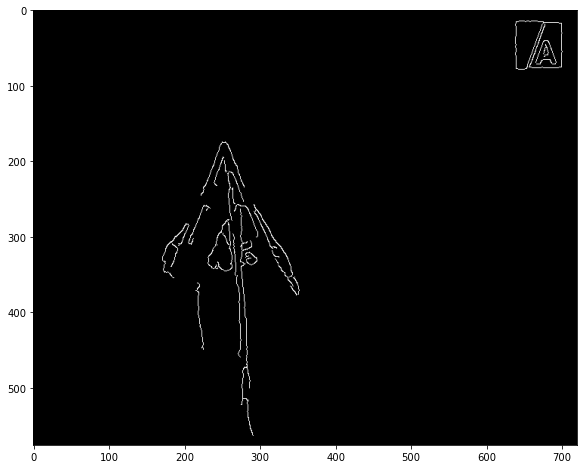

In [3]:
#gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurred_image = cv2.GaussianBlur(img, (7, 7), 0) # filter out week lines
edges_image = cv2.Canny(blurred_image, 50, 200, apertureSize = 3) # 120 is another visually optimal value 
plt.figure(figsize = (10,8))
plt.imshow(edges_image, cmap = "gray")

### Non-probabailist Hough transform 
Some code snippets from: https://medium.com/@tomasz.kacmajor/hough-lines-transform-explained-645feda072ab


In [4]:
def draw_lines(img, houghLines, color=[0, 255, 0], thickness=2):
    for line in houghLines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
 
            cv2.line(img,(x1,y1),(x2,y2),color,thickness)   
                
 
def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    return cv2.addWeighted(initial_img, α, img, β, λ)

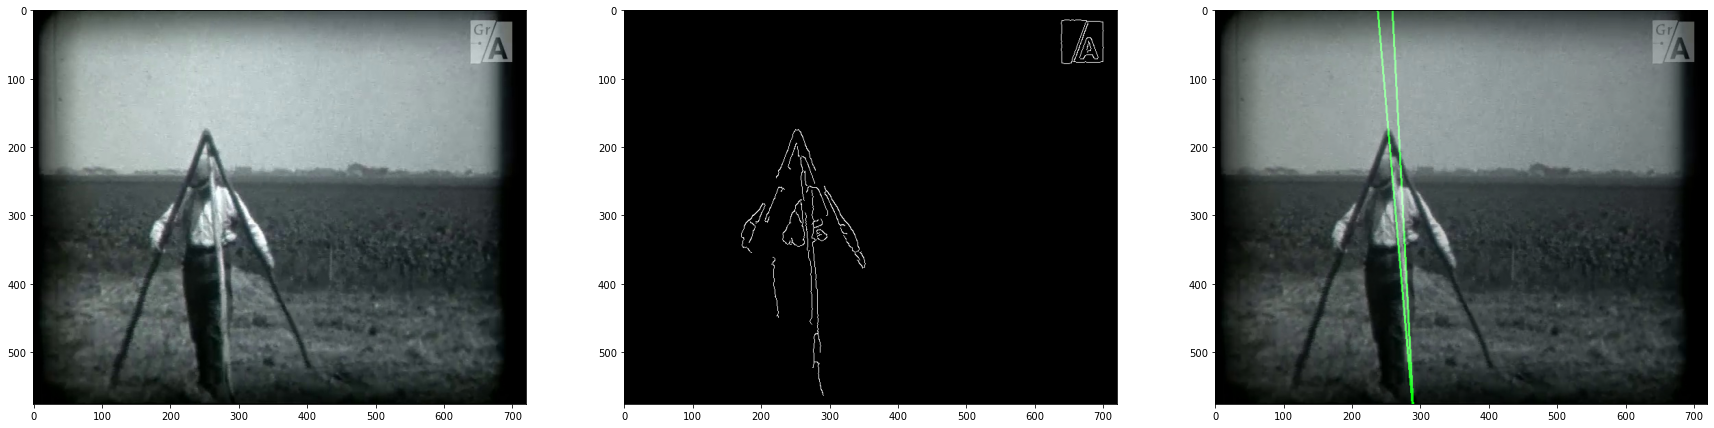

In [5]:
rho_resolution = 1
theta_resolution = np.pi/180
threshold = 100 #Only lines that are greater than threshold will be returned.
 
hough_lines = cv2.HoughLines(edges_image, rho_resolution , theta_resolution , threshold)
 
hough_lines_image = np.zeros_like(img)
draw_lines(hough_lines_image, hough_lines)
original_image_with_hough_lines = weighted_img(hough_lines_image,img)
 
plt.figure(figsize = (30,20))
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(edges_image, cmap='gray')
plt.subplot(133)
plt.imshow(original_image_with_hough_lines, cmap='gray') 

### Probabilistic Hough transform 
This tutorial has been useful: https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html, especially for interpretting the function parameters

1 0.017453292519943295 100 150 30
6


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fcd4b23f430>)

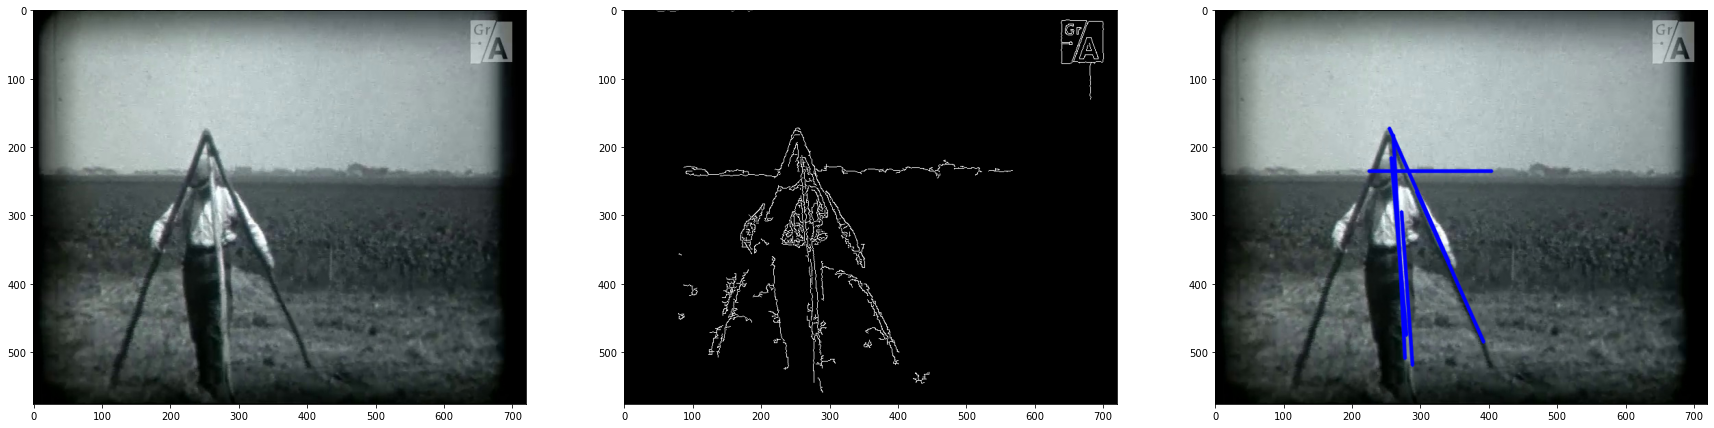

In [6]:
threshold = 100 # The minimum number of intersections in hough space to "detect" a line. higher -> less lines
minLineLength = 150 # The minimum number of points that can form a line. Lines with less than this number of points are disregarded. higher -> less lines
maxLineGap = 30 # The maximum gap between two points to be considered in the same line. higher -> more lines


edges_image = cv2.Canny(img, 50, 200,None, apertureSize = 3)  # without Blur
hough_lines_p = cv2.HoughLinesP(edges_image,1, np.pi / 180, threshold, None, minLineLength, maxLineGap)
print(1, np.pi/180, threshold, minLineLength, maxLineGap)
print(len(hough_lines_p))

original_image_with_hough_lines = img.copy()

for i in range(0, len(hough_lines_p)):
        l = hough_lines_p[i][0]
        cv2.line(original_image_with_hough_lines, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

#original_image_with_hough_lines = weighted_img(hough_lines_p_image,img)
    
plt.figure(figsize = (30,20))
plt.subplot(131), plt.imshow(img)
plt.subplot(132), plt.imshow(edges_image, cmap='gray')
plt.subplot(133), plt.imshow(original_image_with_hough_lines, cmap='gray') 

In [7]:
'''
import cv2 as cv
import math

src = cv.imread(cv.samples.findFile("frames/AV2171/keyframe_1867.0.jpg"), cv.IMREAD_GRAYSCALE)
# Check if image is loaded fine

#blurred_image = cv.GaussianBlur(src, (9, 9), 0) # filter out week lines

dst = cv.Canny(src, 50, 200, None, 3)

# Copy edges to the images that will display the results in BGR
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)


linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

if linesP is not None:
    
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
        

cv.imshow("Source", src)
cv.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)
cv.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)

cv.waitKey()
'''

'\nimport cv2 as cv\nimport math\n\nsrc = cv.imread(cv.samples.findFile("frames/AV2171/keyframe_1867.0.jpg"), cv.IMREAD_GRAYSCALE)\n# Check if image is loaded fine\n\n#blurred_image = cv.GaussianBlur(src, (9, 9), 0) # filter out week lines\n\ndst = cv.Canny(src, 50, 200, None, 3)\n\n# Copy edges to the images that will display the results in BGR\ncdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)\ncdstP = np.copy(cdst)\n\nlines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)\n\nif lines is not None:\n    for i in range(0, len(lines)):\n        rho = lines[i][0][0]\n        theta = lines[i][0][1]\n        a = math.cos(theta)\n        b = math.sin(theta)\n        x0 = a * rho\n        y0 = b * rho\n        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))\n        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))\n        cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)\n\n\nlinesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)\n\nif linesP is not None:\n    \n    for i in range(0, l

## Wrapping the transformations into a function

In [8]:
# Set the parameters

rho_resolution = 1
theta_resolution = np.pi/180
threshold = 100 # The minimum number of intersections in hough space to "detect" a line. higher -> less lines

# Additional parameters for probabilistic
minLineLength = 150 # The minimum number of points that can form a line. Lines with less than this number of points are disregarded. higher -> less lines
maxLineGap = 30 # The maximum gap between two points to be considered in the same line. higher -> more lines


def apply_hough(img, minLineLength = minLineLength, maxLineGap = maxLineGap, probabilistic = True):
    """Applies the Hough transform""" 
    
    if probabilistic:
        edges_image = cv2.Canny(img, 50, 200,None, apertureSize = 3)  # without Blur
        hough_lines = cv2.HoughLinesP(edges_image,rho_resolution, theta_resolution, threshold, None, minLineLength, maxLineGap)
        
    else:
        blurred_image = cv2.GaussianBlur(img, (7, 7), 0) # filter out week lines
        edgs_image = cv2.Canny(blurred_image, 50, 150, apertureSize = 3) # 120 is another visually optimal value 
        hough_lines = cv2.HoughLines(edges_image, rho_resolution , theta_resolution , threshold)
     
    return hough_lines

def get_angle(hough_lines, radians = False):
    if radians:
        return np.arctan2(hough_lines[:, :,3] - hough_lines[:, :,1], hough_lines[:, :,2] - hough_lines[:, :,0])
    else: 
        return np.arctan2(hough_lines[:, :,3] - hough_lines[:, :,1], hough_lines[:, :,2] - hough_lines[:, :,0]) * 180/np.pi # better for numerical stability
    

def plot_lines(img, hough_lines, probabilistic = True):
    """Plots only probabilistic """

    original_image_with_hough_lines = img.copy()
    cmap = "gray" if img.shape[-1] == 3 else None 
        
    if probabilistic:
        for i in range(0, len(hough_lines)):
            l = hough_lines[i][0]
            cv2.line(original_image_with_hough_lines, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
            #break
    
    else:
        hough_lines_image = np.zeros_like(img)
        draw_lines(hough_lines_image, hough_lines)
        original_image_with_hough_lines = weighted_img(hough_lines_image,img)
    
    plt.figure(figsize = (15,10))
    plt.subplot(121), plt.imshow(img)
    plt.subplot(122), plt.imshow(original_image_with_hough_lines, cmap=cmap) 
    

"""
# Example usage
probabilistic = True

#img = plt.imread("frames/contemporary/IMG_2864.jpeg")
hough_lines = apply_hough(img, probabilistic = probabilistic)
plot_lines(img, hough_lines, probabilistic = probabilistic)
"""


'\n# Example usage\nprobabilistic = True\n\n#img = plt.imread("frames/contemporary/IMG_2864.jpeg")\nhough_lines = apply_hough(img, probabilistic = probabilistic)\nplot_lines(img, hough_lines, probabilistic = probabilistic)\n'

In [9]:
hough_lines[0]

array([[-259.       ,    3.0892327]], dtype=float32)

In [10]:
#np.array(hough_lines.reshape(6,4,1), dtype = [("x0",int), ("y0", int), ("x1", int), ("y1", int)])[0]#.shape

In [11]:
#np.sort(np.array(hough_lines, dtype = [("x0",int), ("y0", int), ("x1", int), ("y1", int)]) , order =["x0, y0, x1,y2"]) # SORT BY COORDINATES AND THEN MERGE LINES NEXT EACH OTHER USING CUMDIFF

## Obtaining lines from the archive

- TO-DO: make a reliable model to choose the images (e.g. using correlation and naming paths # name of the file 
- TO-DO: merge overlapping lines together 
- What features do we want to use for the clustering? Length and angle? Or only angle

In [28]:
img_directory = "frames/AV0539"
img_paths = sorted(os.listdir(img_directory))

img_paths = np.random.choice(img_paths, size = int(0.4*len(img_paths)), replace = False) # take a random sample of 10$ of one directory

#imgs = np.array([cv2.imread(os.path.join(img_directory, path)) for path in img_paths])
#flat_imgs = imgs.reshape(imgs.shape[0], imgs.shape[1]*imgs.shape[2]*imgs.shape[3]) # used to calculate correlation using np.corrcoef 

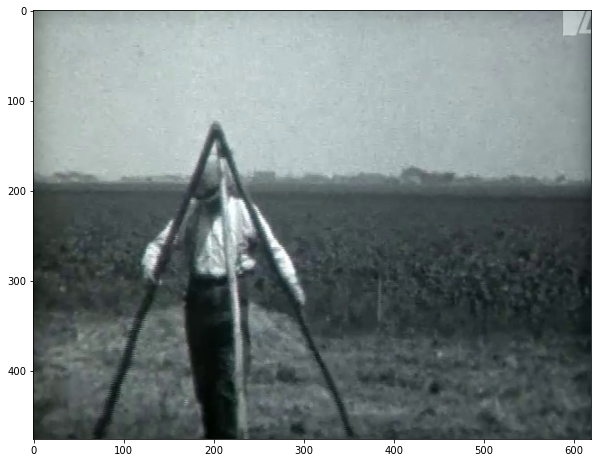

In [29]:
plt.figure(figsize = (10,8))
margin = 50
plt.imshow(img[margin:-margin, margin:-margin])

In [30]:
class matchingObjects:
    
    def __init__(self, path = None, margin = 50, img = None):
        
        if img is None: # read in the image from path
            
            self.path = path

            if margin > 0: # deals with black borders that result in many fake line detections
                self.img = plt.imread(self.path)[margin:-margin, margin:-margin]
            else:
                self.img = plt.imread(self.path)
        
        elif path is None: # np array image is provided
            self.path = None
            if margin > 0: # deals with black borders that result in many fake line detections
                self.img = img[margin:-margin, margin:-margin]
            else:
                self.img = img   
            
        self.shape = self.img.shape
    
    def hough_lines(self, probabilistic = True, radians = False):
        self.lines = apply_hough(self.img, probabilistic= probabilistic)

        if self.lines is not None: # if hough found something
            self.angle = get_angle(self.lines, radians = radians) # radians more stable
            
            x_diff = self.lines[:, :,2] - self.lines[:, :,0]# if 0 then slope will be -inf -> vertical line
            y_diff = self.lines[:, :,3] - self.lines[:, :,1] 
            self.slope = y_diff/x_diff
            self.length = np.sqrt(x_diff**2 + y_diff**2)
    
    def rank_and_pick_lines(self, delta_angle = 1, max_lines = None):
        if self.lines is not None:
            lst0 = self.lines
            order = np.arange(0, len(lst0)).reshape(-1,1)
            lst1 = self.angle
            lst2 = self.length
            merged = np.concatenate([lst1, lst2, order], axis = 1)
            new_order = np.lexsort((lst2, lst1), axis = 0) # sorts first by angle then by length
            merged_new = merged[new_order] 
            
            
            mask = ( np.diff(merged[new_order], axis = 0)[:,:,0] < delta_angle ) 
            series = False
            
            for i in range(len(mask)): # marks 
                if mask[i] == True:
                    series = True
                elif (mask[i] == False) and (series == True):
                    mask[i] = True # make up for the offset in the mask
                    series = False # break the series
                    
            
            grouping_mask = np.concatenate((mask, np.array([[False]])) )
            accum = []
            temp = []


            for i in range(len(grouping_mask)):  

                if grouping_mask[i] == False:
                    if (len(temp)>0): 
                        accum.append(np.array(temp)[np.argmax(np.array(temp), axis = 0)[0][1]])
                        temp = []
                    accum.append(merged_new[i,:,:])


                else: #if grouping_mask[i] == True:

                    if len(temp) > 0:
                        if abs(merged_new[i,:,:][0][0] - temp[-1][0][0]) < delta_angle: 
                            temp.append(merged_new[i,:,:])
                        else: 
                            accum.append(np.array(temp)[np.argmax(np.array(temp), axis = 0)[0][1]])
                            temp = []
                            temp.append(merged_new[i,:,:])
                    else:

                        temp.append(merged_new[i,:,:])
                        
            
            accum = np.sort(np.array(accum), axis =0) #np.array(accum)
            if max_lines is not None: # if the maximum number of lines to be returned is specifed, pick the longest lines
                accum = accum[-max_lines:]
            #print(accum)
            cleaned_order = list(accum[:,:,2].flatten().astype(int))
            self.lines = self.lines[cleaned_order]
            self.angle = self.angle[cleaned_order]
            self.length = self.length[cleaned_order]
            self.slope = self.slope[cleaned_order]
            #print(np.max(self.length))
 
def get_non_zero_objects(obj_list):
    new_obj_list = []
    count_lines = 0
    for obj in obj_list:
        if obj.lines is not None:
            new_obj_list.append(obj)
            count_lines += len(obj.lines)
            
            
    print("{}% of input list contain lines".format(round(len(new_obj_list)/len(obj_list) * 100), 2))
    print("Given that the img contains a line, on average there are {} detected lines per image".format( round( count_lines/len(new_obj_list), 2 ) ))
    return new_obj_list
        

In [31]:
img_objects = np.array([matchingObjects(os.path.join(img_directory, path)) for path in img_paths])

In [32]:
# Apply hough transform to all objects in the array above
for obj in img_objects:
    obj.hough_lines()

<ipython-input-30-e8b61de4cfe8>:31: RuntimeWarning: divide by zero encountered in true_divide
  self.slope = y_diff/x_diff


In [33]:
non_zero_objects = get_non_zero_objects(img_objects)

67% of input list contain lines
Given that the img contains a line, on average there are 14.28 detected lines per image


### Showacse of the line filtering method
Plots before and after applying the filtering of the lines

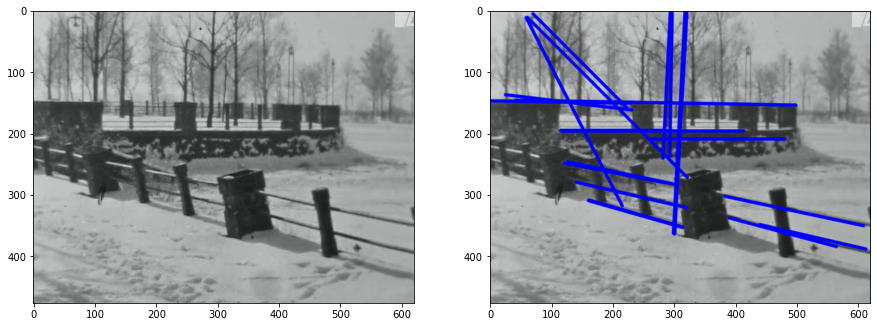

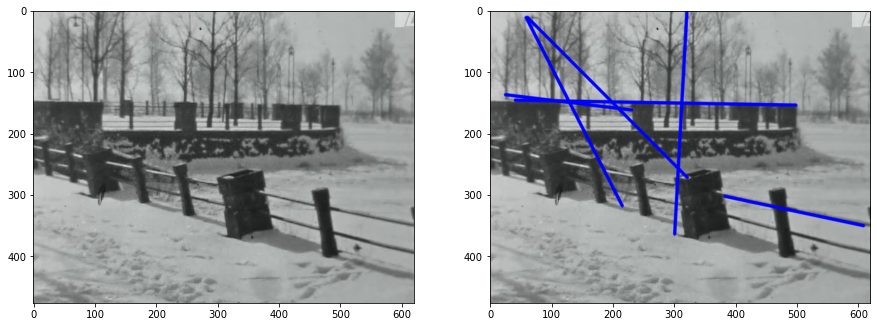

In [34]:
sample_number = 17 # 3
plot_lines(non_zero_objects[sample_number].img, non_zero_objects[sample_number].lines)
non_zero_objects[sample_number].rank_and_pick_lines(delta_angle=3, max_lines=None)
plot_lines(non_zero_objects[sample_number].img, non_zero_objects[sample_number].lines)

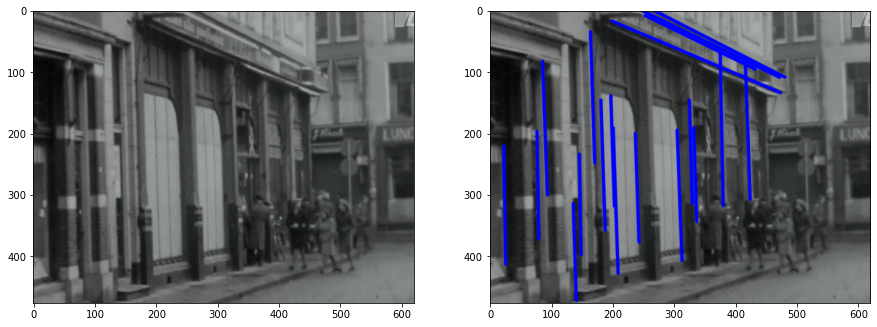

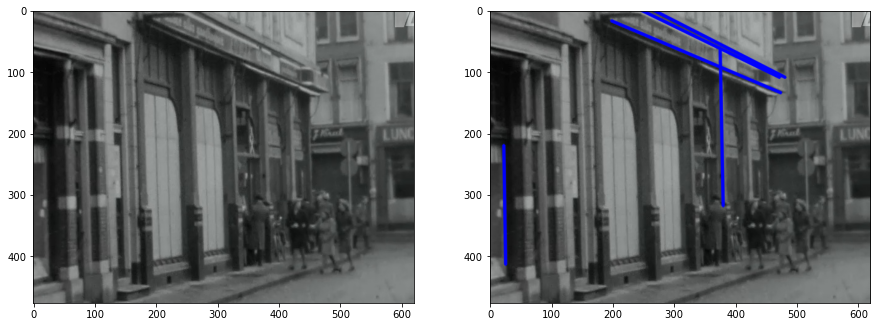

In [37]:
sample_number = 11 # 3
plot_lines(non_zero_objects[sample_number].img, non_zero_objects[sample_number].lines)
non_zero_objects[sample_number].rank_and_pick_lines(delta_angle=1, max_lines=None)
plot_lines(non_zero_objects[sample_number].img, non_zero_objects[sample_number].lines)

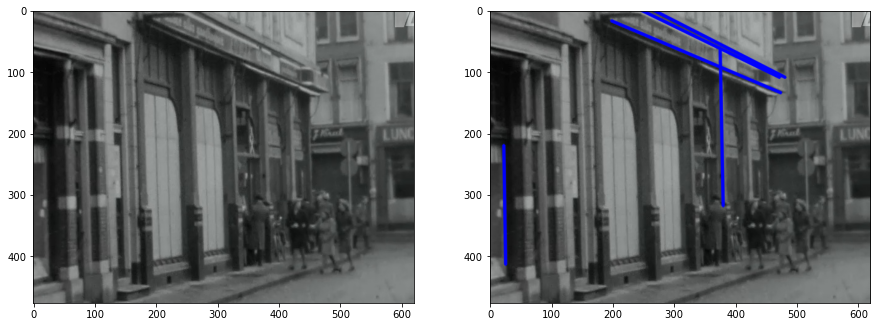

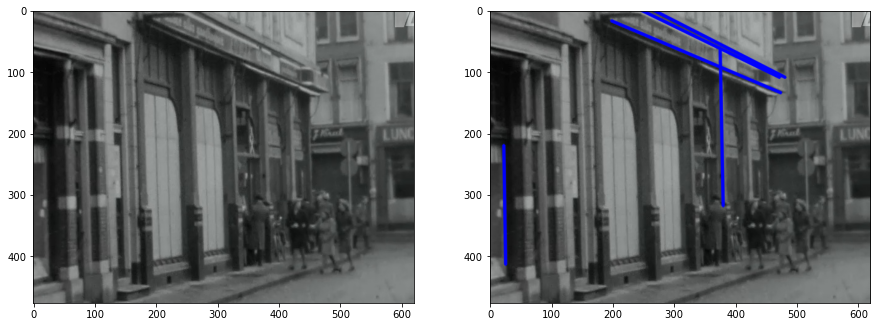

In [38]:
sample_number = 11 # 3
plot_lines(non_zero_objects[sample_number].img, non_zero_objects[sample_number].lines)
non_zero_objects[sample_number].rank_and_pick_lines(delta_angle=1, max_lines=5)
plot_lines(non_zero_objects[sample_number].img, non_zero_objects[sample_number].lines)

In [793]:
lst0 = non_zero_objects[17].lines
order = np.arange(0, len(lst0)).reshape(-1,1)
lst1 = non_zero_objects[17].angle
lst2 = non_zero_objects[17].length

print(len(lst0), len(lst1), len(lst2))
merged = np.concatenate([lst1, lst2, order], axis = 1)

54 54 54


In [795]:
new_order = np.lexsort((lst2, lst1), axis = 0)
delta_angle = 3
merged_new = merged[new_order]
merged_new

array([[[-90.        , 159.        ,  17.        ]],

       [[-90.        , 246.        ,  26.        ]],

       [[-90.        , 250.        ,   4.        ]],

       [[-90.        , 260.        ,   1.        ]],

       [[-90.        , 262.        ,   7.        ]],

       [[-90.        , 268.        ,  12.        ]],

       [[-90.        , 291.        ,  21.        ]],

       [[-89.09061955, 252.03174403,  25.        ]],

       [[-89.03713637, 238.03361107,  46.        ]],

       [[-88.11181199, 182.09887424,  10.        ]],

       [[-87.96668433, 169.10647533,  38.        ]],

       [[-87.9324582 , 277.18044664,   8.        ]],

       [[-86.83187962, 271.41481168,  27.        ]],

       [[-45.        , 444.06305859,  18.        ]],

       [[ -3.99322724, 574.39446376,  36.        ]],

       [[ -3.97774065, 302.72925197,  31.        ]],

       [[ -2.05588879, 195.12560058,  48.        ]],

       [[  0.        , 195.        ,  51.        ]],

       [[  4.94123891, 348.2

In [796]:
mask = ( np.diff(merged[new_order], axis = 0)[:,:,0] < delta_angle )  #( np.diff(merged[new_order], axis = 0)[:,:,1]  >0  )

In [797]:
series = False

for i in range(len(mask)):
    if mask[i] == True:
        series = True
    if (mask[i] == False) and (series == True):
        #print("here", mask[i])
        mask[i] = True
        series = False
        

In [798]:
merged_new[grouping_mask]

array([[-90.        , 159.        ,  17.        ],
       [-90.        , 246.        ,  26.        ],
       [-90.        , 250.        ,   4.        ],
       [-90.        , 260.        ,   1.        ],
       [-90.        , 262.        ,   7.        ],
       [-90.        , 268.        ,  12.        ],
       [-90.        , 291.        ,  21.        ],
       [-89.09061955, 252.03174403,  25.        ],
       [-89.03713637, 238.03361107,  46.        ],
       [-88.11181199, 182.09887424,  10.        ],
       [-87.96668433, 169.10647533,  38.        ],
       [-87.9324582 , 277.18044664,   8.        ],
       [-86.83187962, 271.41481168,  27.        ],
       [ -3.99322724, 574.39446376,  36.        ],
       [ -3.97774065, 302.72925197,  31.        ],
       [ -2.05588879, 195.12560058,  48.        ],
       [  0.        , 195.        ,  51.        ],
       [ 16.85075321, 217.33154396,  50.        ],
       [ 16.91576008, 202.7732724 ,  29.        ],
       [ 16.98365236, 212.25691

In [802]:
grouping_mask = np.concatenate((mask, np.array([[False]])) )
accum = []
temp = []

for i in range(len(grouping_mask)):
    
    #print(i, "diff mat i", diff_mat[i])

    print(i,"this iter", merged_new[i,:,:] )  
    
    if grouping_mask[i] == False:
        if (len(temp)>0):
            #print(temp)
            accum.append(np.array(temp)[np.argmax(np.array(temp), axis = 0)[0][1]])
            temp = []
            #break
        #else:
        accum.append(merged_new[i,:,:])
        
        #group += 1
        
    else: #if grouping_mask[i] == True:
        
        if len(temp) > 0:
            print(abs(merged_new[i,:,:][0][0] - temp[-1][0][0]))
            if abs(merged_new[i,:,:][0][0] - temp[-1][0][0]) < delta_angle:
                #print("hereee")
                #accum.append(np.max(np.array(temp), axis = 0))
                #temp = []
                temp.append(merged_new[i,:,:])
            else:
            
                accum.append(np.array(temp)[np.argmax(np.array(temp), axis = 0)[0][1]])
                temp = []
                temp.append(merged_new[i,:,:])
                
            
        else:
        
            temp.append(merged_new[i,:,:])
            
    #print("temp", temp)
     
    #print(temp)
    #print(merged_new[1,:,:])
    #break
    

0 this iter [[-90. 159.  17.]]
1 this iter [[-90. 246.  26.]]
0.0
2 this iter [[-90. 250.   4.]]
0.0
3 this iter [[-90. 260.   1.]]
0.0
4 this iter [[-90. 262.   7.]]
0.0
5 this iter [[-90. 268.  12.]]
0.0
6 this iter [[-90. 291.  21.]]
0.0
7 this iter [[-89.09061955 252.03174403  25.        ]]
0.9093804491991335
8 this iter [[-89.03713637 238.03361107  46.        ]]
0.05348317643708356
9 this iter [[-88.11181199 182.09887424  10.        ]]
0.9253243811047156
10 this iter [[-87.96668433 169.10647533  38.        ]]
0.14512766267345967
11 this iter [[-87.9324582  277.18044664   8.        ]]
0.03422613520667994
12 this iter [[-86.83187962 271.41481168  27.        ]]
1.1005785709726865
13 this iter [[-45.         444.06305859  18.        ]]
14 this iter [[ -3.99322724 574.39446376  36.        ]]
15 this iter [[ -3.97774065 302.72925197  31.        ]]
0.015486592201417348
16 this iter [[ -2.05588879 195.12560058  48.        ]]
1.9218518607075907
17 this iter [[  0. 195.  51.]]
2.05588878500

## Creating the dataframe of lines

In [39]:
import pandas as pd

In [40]:
for obj in non_zero_objects:
    obj.rank_and_pick_lines(delta_angle=3, max_lines=7) # apply line filtering

In [41]:
paths = []
angles = []
lines = []
lengths = []

for obj in non_zero_objects:
    for line_num in range(len(obj.lines)):
        paths.append(obj.path)
        lines.append(obj.lines[line_num])
        angles.append(obj.angle[line_num])
        lengths.append(obj.length[line_num])
        
    

In [42]:
data = {"paths": paths, "angles":angles, "lines": lines, "lengths": lengths}
data = pd.DataFrame(data)
data

,paths,angles,lines,lengths
0,frames/AV0539/keyframe_2258.0.jpg,[89.07221422553832],"[[270, 217, 274, 464]]",[247.0323865407125]
1,frames/AV0539/keyframe_2258.0.jpg,[88.99742619623996],"[[291, 39, 298, 439]]",[400.0612453112648]
2,frames/AV0539/keyframe_2258.0.jpg,[26.041816594893803],"[[317, 10, 581, 139]]",[293.83158441529054]
3,frames/AV0539/keyframe_2258.0.jpg,[11.996899307923579],"[[52, 73, 292, 124]]",[245.35892076710803]
4,frames/AV0539/keyframe_6694.0.jpg,[10.034508079716565],"[[0, 6, 616, 115]]",[625.5693406809512]
...,...,...,...,...
645,frames/AV0539/keyframe_5549.0.jpg,[89.08699713318458],"[[361, 40, 365, 291]]",[251.03187048659777]
646,frames/AV0539/keyframe_5549.0.jpg,[2.097218181951734],"[[1, 310, 356, 323]]",[355.2379484233068]
647,frames/AV0539/keyframe_5549.0.jpg,[-13.804902412124349],"[[362, 87, 537, 44]]",[180.20543831971332]
648,frames/AV0539/keyframe_5549.0.jpg,[24.983157007310073],"[[4, 93, 283, 223]]",[307.8002599089221]


## Matching extracted lines to an image

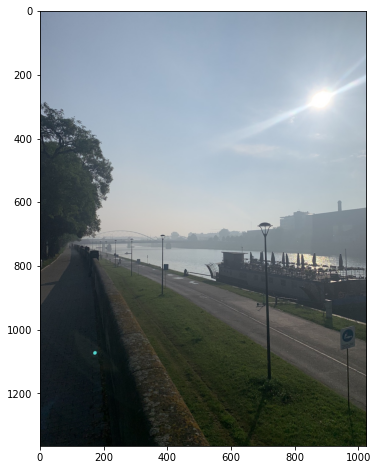

In [43]:
# Loading example image 

img = plt.imread("frames/contemporary/IMG_2864.jpeg")
#img = plt.imread("frames/AV0539/keyframe_2966.0.jpg")
#img = cv2.imread("/Users/blazejmanczak/Desktop/sudoku.jpg")
obj = matchingObjects(img = img, margin = 0)
plt.figure(figsize = (10,8))
plt.imshow(obj.img)

In [44]:
obj.hough_lines()

<ipython-input-30-e8b61de4cfe8>:31: RuntimeWarning: divide by zero encountered in true_divide
  self.slope = y_diff/x_diff


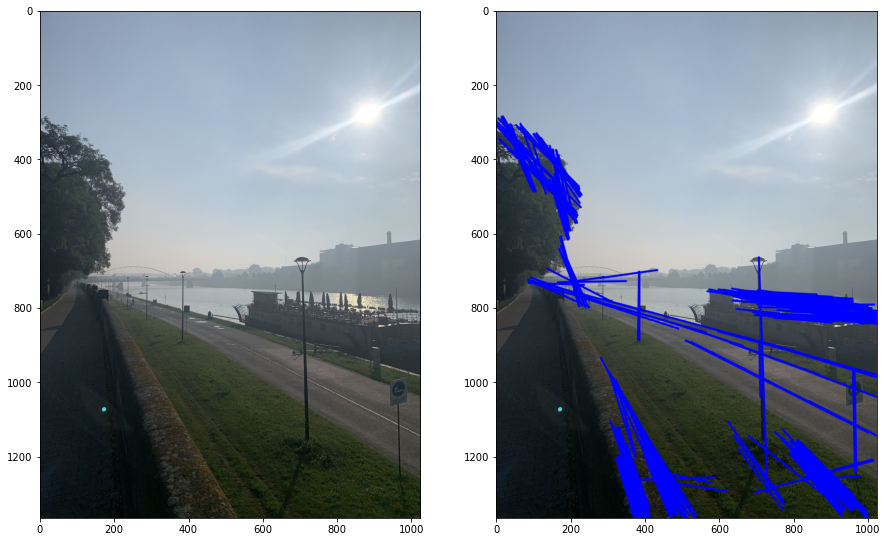

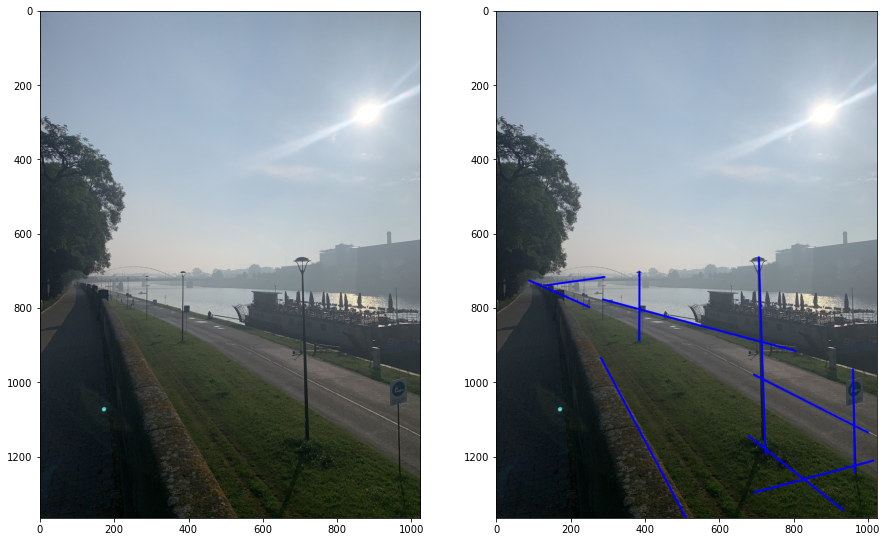

In [45]:
plot_lines(obj.img, obj.lines, probabilistic= True)
obj.rank_and_pick_lines(delta_angle = 3, max_lines =10) # choose 5 best, diverse lines
plot_lines(obj.img, obj.lines, probabilistic=True)

## Query the data frame for similiar lines

bias the mathcing towards vertical lines

In [48]:
obj.angle

array([[ 88.05485324],
       [ 14.99323972],
       [ 26.86191784],
       [-90.        ],
       [ 88.97696981],
       [ -8.02723751],
       [ 61.96210361],
       [ 23.83190053],
       [ 37.99873244],
       [-14.99805306]])

In [80]:
data.loc[data["angles"]> & data["len"]]

'frames/AV0539/keyframe_4822.0.jpg'

In [ ]:
# pick longest lines, diveristy parameter for the angle

In [109]:
get_angle(hough_lines)

array([[ 0.46760016],
       [ 1.53660443],
       [ 0.26320946],
       [ 0.78539816],
       [ 0.03569911],
       [ 0.45463884],
       [ 0.26250675],
       [ 1.04699728],
       [ 0.83752481],
       [ 0.47153699],
       [ 0.46876265],
       [ 1.32974306],
       [ 1.04542945],
       [ 0.19220829],
       [-0.01844809],
       [ 0.34956183],
       [ 1.32387403],
       [ 0.20934158],
       [ 1.14992417],
       [ 0.03729613],
       [ 0.85433109],
       [ 0.26082388],
       [ 1.15077182],
       [ 0.85480521],
       [ 1.13511345],
       [ 1.15043616],
       [ 0.18932192],
       [ 1.32679423],
       [ 1.3277959 ],
       [ 0.05180546],
       [ 0.12352889],
       [ 0.15541845],
       [ 0.15819996],
       [ 0.19043512],
       [ 0.47052035],
       [ 0.15482041],
       [ 0.05473978],
       [ 0.05233312],
       [ 0.08659958],
       [ 0.05180546],
       [ 0.19288431],
       [ 0.19260326],
       [ 0.1740036 ],
       [ 1.32974306],
       [ 1.14937712],
       [ 1

In [106]:
np.arctan2(hough_lines[:, :,3] - hough_lines[:, :,1], hough_lines[:, :,2] - hough_lines[:, :,0])# * 180/np.pi

array([[26.79151553],
       [88.04094839],
       [15.08079131],
       [45.        ],
       [ 2.04540849],
       [26.04888695],
       [15.04052877],
       [59.9885253 ],
       [47.98663699],
       [27.01707951],
       [26.85812166],
       [76.18866521],
       [59.89869543],
       [11.0127236 ],
       [-1.05699778],
       [20.02841753],
       [75.85239461],
       [11.9943892 ],
       [65.88580146],
       [ 2.13691085],
       [48.94956564],
       [14.94410727],
       [65.93436842],
       [48.97673098],
       [65.03721017],
       [65.91513663],
       [10.84734684],
       [76.01970942],
       [76.07710115],
       [ 2.96823403],
       [ 7.07768403],
       [ 8.90482099],
       [ 9.06418991],
       [10.91112838],
       [26.9588304 ],
       [ 8.87055586],
       [ 3.13635837],
       [ 2.99846714],
       [ 4.96179071],
       [ 2.96823403],
       [11.05145703],
       [11.03535416],
       [ 9.96967195],
       [76.18866521],
       [65.85445804],
       [65